In [9]:
# 2.1.Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
# 2.2. Changing the size of images
img_height, img_width = 224, 224
batch_size = 32

In [7]:
# 2.3.Linking images to different classes
img_size = 224
batch_size = 32
data_dir = "D:/rice_classification/Rice_Image_Dataset"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

num_classes = len(train_generator.class_indices)


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


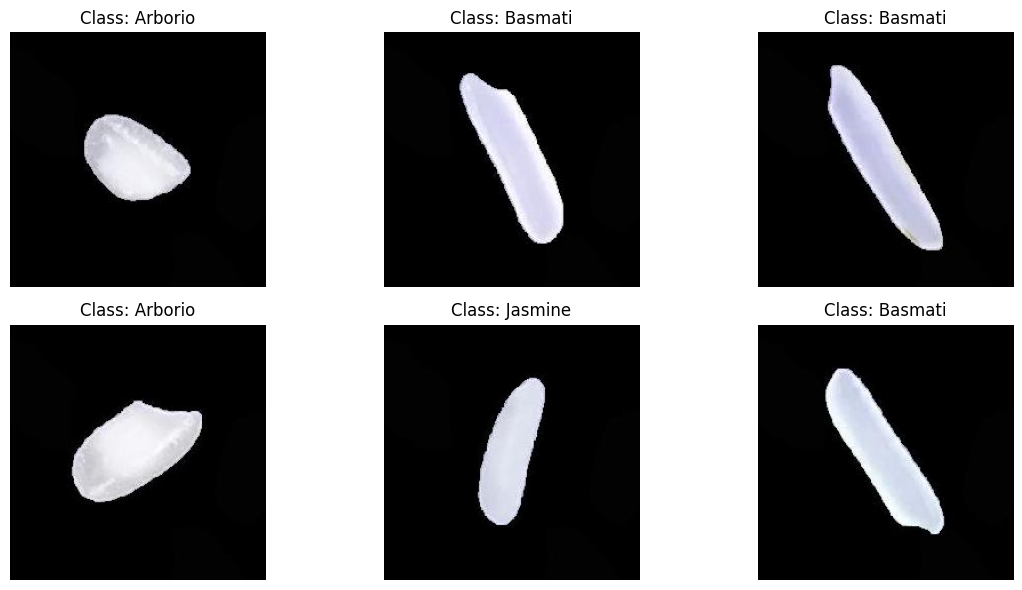

In [4]:
# 2.5.Preview of Images
# Preview 6 sample images from the training generator
images, labels = next(iter(train_generator))
class_names = list(train_generator.class_indices.keys())

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(f"Class: {class_names[label_index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 [==============================] - 1s 0us/step


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [10]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint("model/rice_classification_model.keras", save_best_only=True)
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10
 201/1875 [==>...........................] - ETA: 48:17 - loss: 0.5831 - accuracy: 0.8276

KeyboardInterrupt: 

In [12]:
model.evaluate(val_generator)

model.save("rice_classification_model.keras")


469/469 [==============================] - 605s 1s/step - loss: 0.2342 - accuracy: 0.9386


In [13]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.legend()
plt.show()


NameError: name 'history' is not defined